In [1]:
import sys

sys.path.append("../")


In [2]:
import os.path

import matplotlib.pyplot as plt
from tqdm import tqdm

from monai.data import Dataset, DataLoader
from monai.transforms import (
    Compose,
    LoadImaged,
    EnsureChannelFirstd,
    NormalizeIntensityd,
    # HistogramNormalized
)

# from custom_transforms import NormalizeAndClipIntensityd
import numpy as np
from glob import glob
import gc

from typing import Iterable, Mapping


In [3]:
NUM_WORKERS = 4
TRANS_TYPE = "nontrunc"

def get_dataloder(image_dir: str):
    image_paths = glob(os.path.join(image_dir, "*.nii.gz"))

    data_dicts = tuple({"image": img} for img in image_paths)
    transforms = Compose(
        (
            LoadImaged(reader="NibabelReader", keys="image"),
            EnsureChannelFirstd(keys="image"),
            # NormalizeAndClipIntensityd(keys="image", clip_range=(-2.5, 2.5)),
            NormalizeIntensityd(keys="image"),
            # HistogramNormalized(keys="image", min=-1, max=1),
        )
    )
    dataset = Dataset(data_dicts, transforms)
    dl = DataLoader(
        dataset,
        batch_size=1,
        num_workers=NUM_WORKERS,
    )
    return dl


In [4]:
def get_images(dl: Iterable[Mapping[str, np.ndarray]]):
    images = np.array((), dtype=np.float32)
    for batch in tqdm(dl):
        image = batch["image"].ravel()
        images = np.concatenate((images, image))
    return images


In [5]:
VISUALIZATION_DIR = "../visualizations/"


def plot_images(images: np.ndarray, short_code: str):
    plt.figure(figsize=(15, 10))
    plt.hist(images, bins="auto", log=True)
    plt.xlabel("Image Intensity")
    plt.ylabel("Number of pixels")
    plt.savefig(
        os.path.join(VISUALIZATION_DIR, f"{short_code}.png"), bbox_inches="tight"
    )


In [6]:
def main(image_dir: str, ds_type: str):
    dl = get_dataloder(image_dir)
    images = get_images(dl)
    plot_images(images, f"{ds_type}_{TRANS_TYPE}")
    gc.collect()


In [7]:
ROOT_DIR = "/mnt/HDD2/flare2022/datasets/FLARE2022"


### Plotting and saving labeled images

100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


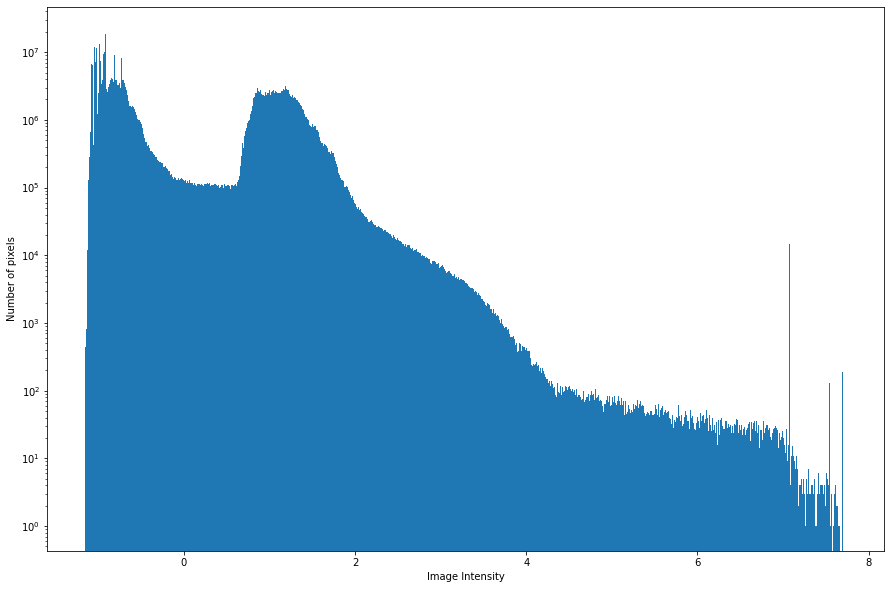

In [8]:
main(os.path.join(ROOT_DIR, "Training/FLARE22_LabeledCase50/images"), "labeled")


### Plotting and saving validation images

100%|██████████| 50/50 [01:49<00:00,  2.20s/it]


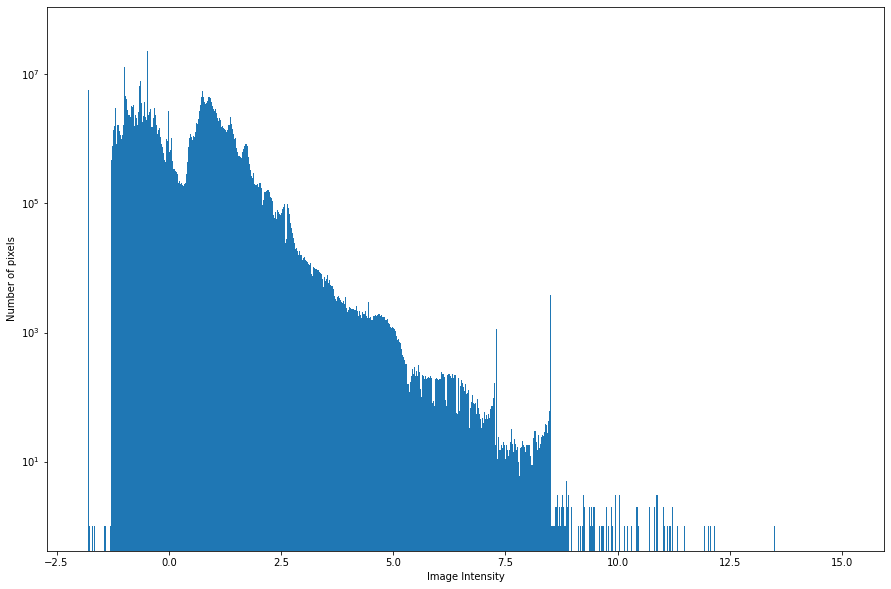

In [9]:
main(os.path.join(ROOT_DIR, "Validation"), "validation")

### Plotting and saving unlabeled images

In [10]:
# main(os.path.join(ROOT_DIR, "Training/Unlabeled"), "unlabeled")